# Proyek Analisis Data: E-commerce Public Dataset
- Nama: Ibrahim
- Email: segav.assegaf@gmail.com
- Id Dicoding: 

## Menentukan Pertanyaan Bisnis

- produk apa yang memiliki penjualan terbanyak dan tersedikit?
- produk apa yang memiliki review terbanyak dan tersedikit?
- customer dari negara mana yang memiliki pembelian terbanyak dan tersedikit?
- kapan terakhir customer melakukan pembelian?
- seberapa sering customer melakukan pembelian?
- berapa banyak uang yang dihabiskan customer untuk melakukan pembelian?
- seller dari negara mana yang memiliki penjualan terbanyak dan tersedikit?

## Menyiapkan semua library yang dibutuhkan

In [363]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [364]:
df_customers = pd.read_csv('data/customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [365]:
df_orderItems = pd.read_csv('data/order_items_dataset.csv')
df_orderItems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [366]:
df_orderPayments = pd.read_csv('data/order_payments_dataset.csv')
df_orderPayments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [367]:
df_orderReviews = pd.read_csv('data/order_reviews_dataset.csv')
df_orderReviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [368]:
df_orders = pd.read_csv('data/orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [369]:
df_products = pd.read_csv('data/products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [370]:
df_sellers = pd.read_csv('data/sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [371]:
df_customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [372]:
print("Jumlah data dupllikat:", df_customers.duplicated().sum())
df_customers.info()

Jumlah data dupllikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [373]:
df_customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [374]:
df_orderItems.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [375]:
print("Jumlah data dupllikat:", df_orderItems.duplicated().sum())
df_orderItems.info()

Jumlah data dupllikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [376]:
df_orderItems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [377]:
df_orderPayments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [378]:
print("Jumlah data duplikat:", df_orderPayments.duplicated().sum())
df_orderPayments.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [379]:
df_orderPayments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [380]:
df_orderReviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [381]:
print("Jumlah data duplikat:", df_orderReviews.duplicated().sum())
df_orderReviews.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [382]:
df_orderReviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [383]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [384]:
print("Jumlah data duplikat:", df_orders.duplicated().sum())
df_orders.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [385]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [386]:
print("Jumlah data duplikat:", df_products.duplicated().sum())
df_products.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [387]:
df_products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [388]:
df_sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [389]:
print("Jumlah data duplikat:", df_sellers.duplicated().sum())
df_sellers.info()

Jumlah data duplikat: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [390]:
df_sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

In [391]:
# menghapus kolom review_comment_title & review_comment_message karena tidak diperlukan
df_orderReviews.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)
df_orderReviews.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [392]:
# menghapus kolom order_approved_at, order_delivered_carrier_date, order_delivered_customer_date karena tidak diperlukan
df_orders.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
df_orders.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

In [393]:
df_products.dropna(inplace=True)
df_products.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [394]:
# mengubah tipe data menjadi datetime
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ MB


## Exploratory Data Analysis (EDA)

### Explore Product Sales

In [395]:
# menggabungkan df_orders & df_orderItems
df_productSales = pd.merge(df_orders, df_orderItems, how='inner', on='order_id')

# menggabungkan df_productSales & df_products
df_productSales = pd.merge(df_productSales, df_products, how='inner', on='product_id')
df_productSales = df_productSales[['order_id', 'product_id']]
df_productSales.head(5)

,order_id,product_id
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a
1,128e10d95713541c87cd1a2e48201934,87285b34884572647811a353c7ac498a
2,0e7e841ddf8f8f2de2bad69267ecfbcf,87285b34884572647811a353c7ac498a
3,bfc39df4f36c3693ff3b63fcbea9e90a,87285b34884572647811a353c7ac498a
4,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8


In [396]:
df_productSales = df_productSales.groupby('product_id', as_index=False)['order_id'].count().sort_values(by='order_id', ascending=False)
df_productSales.columns = ['product_id', 'order_count']
df_productSales.head()

,product_id,order_count
21723,aca2eb7d00ea1a7b8ebd4e68314663af,527
19393,99a4788cb24856965c36a24e339b6058,488
8455,422879e10f46682990de24d770e7f83d,484
7230,389d119b48cf3043d311335e499d9c6b,392
6949,368c6c730842d78016ad823897a372db,388


### Explore Product Review Score

In [397]:
# menggabungkan df_orderRivews & df_orderItems
df_productReviews = pd.merge(df_orderReviews, df_orderItems, how='inner', on='order_id')

# menggabungkan df_productReviews & df_products
df_productReviews = pd.merge(df_productReviews, df_products, how='inner', on='product_id')
df_productReviews = df_productReviews[['product_id', 'review_score']]
df_productReviews.head()

,product_id,review_score
0,fd25ab760bfbba13c198fa3b4f1a0cd3,4
1,fd25ab760bfbba13c198fa3b4f1a0cd3,4
2,fd25ab760bfbba13c198fa3b4f1a0cd3,5
3,fd25ab760bfbba13c198fa3b4f1a0cd3,5
4,be0dbdc3d67d55727a65d4cd696ca73c,5


In [398]:
# mengambil rata-rata dan jumlah review score setiap product
df_reviews = df_productReviews.groupby('product_id')['review_score'].agg(['mean', 'count']).reset_index()
df_reviews.columns = ['product_id', 'review_mean', 'review_count']
df_reviews = df_reviews.sort_values(by=['review_count', 'review_mean'], ascending=False)
df_reviews.head()

,product_id,review_mean,review_count
21614,aca2eb7d00ea1a7b8ebd4e68314663af,4.019084,524
8404,422879e10f46682990de24d770e7f83d,3.946502,486
19293,99a4788cb24856965c36a24e339b6058,3.898340,482
7186,389d119b48cf3043d311335e499d9c6b,4.117647,391
6908,368c6c730842d78016ad823897a372db,3.922680,388


### Explore Customer State

In [399]:
df_customerState = df_customers.copy()
df_customerState = df_customerState[['customer_id', 'customer_state']]
customerState = df_customerState.groupby('customer_state', as_index=False).count().sort_values(by='customer_id', ascending=False)
customerState.head()

,customer_state,customer_id
25,SP,41746
18,RJ,12852
10,MG,11635
22,RS,5466
17,PR,5045


### Explore Customer Recency

In [400]:
df_customerRFM = pd.merge(df_orders, df_orderPayments, how='inner', on='order_id')
df_customerRFM = df_customerRFM[['order_id', 'customer_id', 'order_purchase_timestamp', 'payment_value']]
df_customerRFM.head()

,order_id,customer_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,179.12


In [401]:
# anggap hari ini adalah 1 hari setelah pembelian terakhir
today = df_customerRFM['order_purchase_timestamp'].max() + pd.to_timedelta(1, 'D')
today

Timestamp('2018-10-18 17:30:18')

In [402]:
recency = pd.DataFrame(df_customerRFM.groupby('customer_id', as_index=False)['order_purchase_timestamp'].max())
recency.columns = ['customer_id', 'last purchase date']
recency['recency'] = recency['last purchase date'].apply(lambda x: (today - x).days)
recency = recency.sort_values(by='recency')
recency.head()

,customer_id,last purchase date,recency
63969,a4b417188addbc05b26b72d5e44837a1,2018-10-17 17:30:18,1
51713,856336203359aa6a61bf3826f7d84c49,2018-10-16 20:16:02,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,2018-10-03 18:55:29,14
74610,bf6181a85bbb4115736c0a8db1a53be3,2018-10-01 15:30:09,17
15595,2823ffda607a2316375088e0d00005ec,2018-09-29 09:13:03,19


### Explore Customer Frequency

In [403]:
frequency = pd.DataFrame(df_customerRFM.groupby('customer_id', as_index=False)['order_id'].count())
frequency.columns = ['customer_id', 'frequency']
frequency = frequency.sort_values(by='frequency', ascending=False)
frequency.head()

,customer_id,frequency
60183,9af2372a1e49340278e7c1ef8d749f34,29
56941,92cd3ec6e2d643d4ebd0e3d6238f69e2,26
69426,b246eeed30b362c09d867b9e598bee51,22
15183,270c23a11d024a44c896d1894b261a83,21
7586,13aa59158da63ba0e93ec6ac2c07aacb,19


### Explore Customer Monetary

In [404]:
monetary = pd.DataFrame(df_customerRFM.groupby('customer_id', as_index=False)['payment_value'].sum())
monetary.columns = ['customer_id', 'monetary']
monetary = monetary.sort_values(by='monetary', ascending=False)
monetary.head()

,customer_id,monetary
8546,1617b1357756262bfa56ab541c47bc16,13664.08
91984,ec5b2ba62e574342386871631fafd3fc,7274.88
77521,c6e2731c5b391845f6800c97401a43a9,6929.31
95123,f48d464a0baaea338cb25f816991ab1f,6922.21
24771,3fd6777bbce08a352fddd04e4a7cc8f6,6726.66


### Explore Seller State

In [405]:
df_sellerState = pd.merge(df_orderItems, df_sellers, how='inner', on='seller_id')
df_sellerState = df_sellerState[['seller_id', 'seller_state']]
sellerState = df_sellerState.groupby('seller_state', as_index=False).count().sort_values(by='seller_id', ascending=False)
sellerState.head()

,seller_state,seller_id
22,SP,80342
8,MG,8827
15,PR,8671
16,RJ,4818
20,SC,4075


### Mengubah Data Akhir ke CSV

In [406]:
products_df = pd.merge(df_productSales, df_reviews, how='inner', on='product_id')
products_df.head()
products_df.to_csv('./dashboard/products.csv', index=False)

In [407]:
customers_df = pd.merge(df_customerState, recency, how='inner', on='customer_id')
customers_df = pd.merge(customers_df, frequency, how='inner', on='customer_id')
customers_df = pd.merge(customers_df, monetary, how='inner', on='customer_id')
customers_df.to_csv('./dashboard/customers.csv', index=False)
customers_df.sort_values(by='recency').head()

,customer_id,customer_state,last purchase date,recency,frequency,monetary
85414,a4b417188addbc05b26b72d5e44837a1,SP,2018-10-17 17:30:18,1,1,89.71
69138,856336203359aa6a61bf3826f7d84c49,PI,2018-10-16 20:16:02,1,1,222.03
68311,4c2ec60c29d10c34bd49cb88aa85cfc4,SP,2018-10-03 18:55:29,14,1,197.55
75901,bf6181a85bbb4115736c0a8db1a53be3,RJ,2018-10-01 15:30:09,17,1,80.38
75984,2823ffda607a2316375088e0d00005ec,SP,2018-09-29 09:13:03,19,1,137.03


In [408]:
sellers_df = df_sellerState.copy()
sellers_df.head()
sellers_df.to_csv('./dashboard/sellers.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: produk apa yang memiliki penjualan terbanyak dan tersedikit?

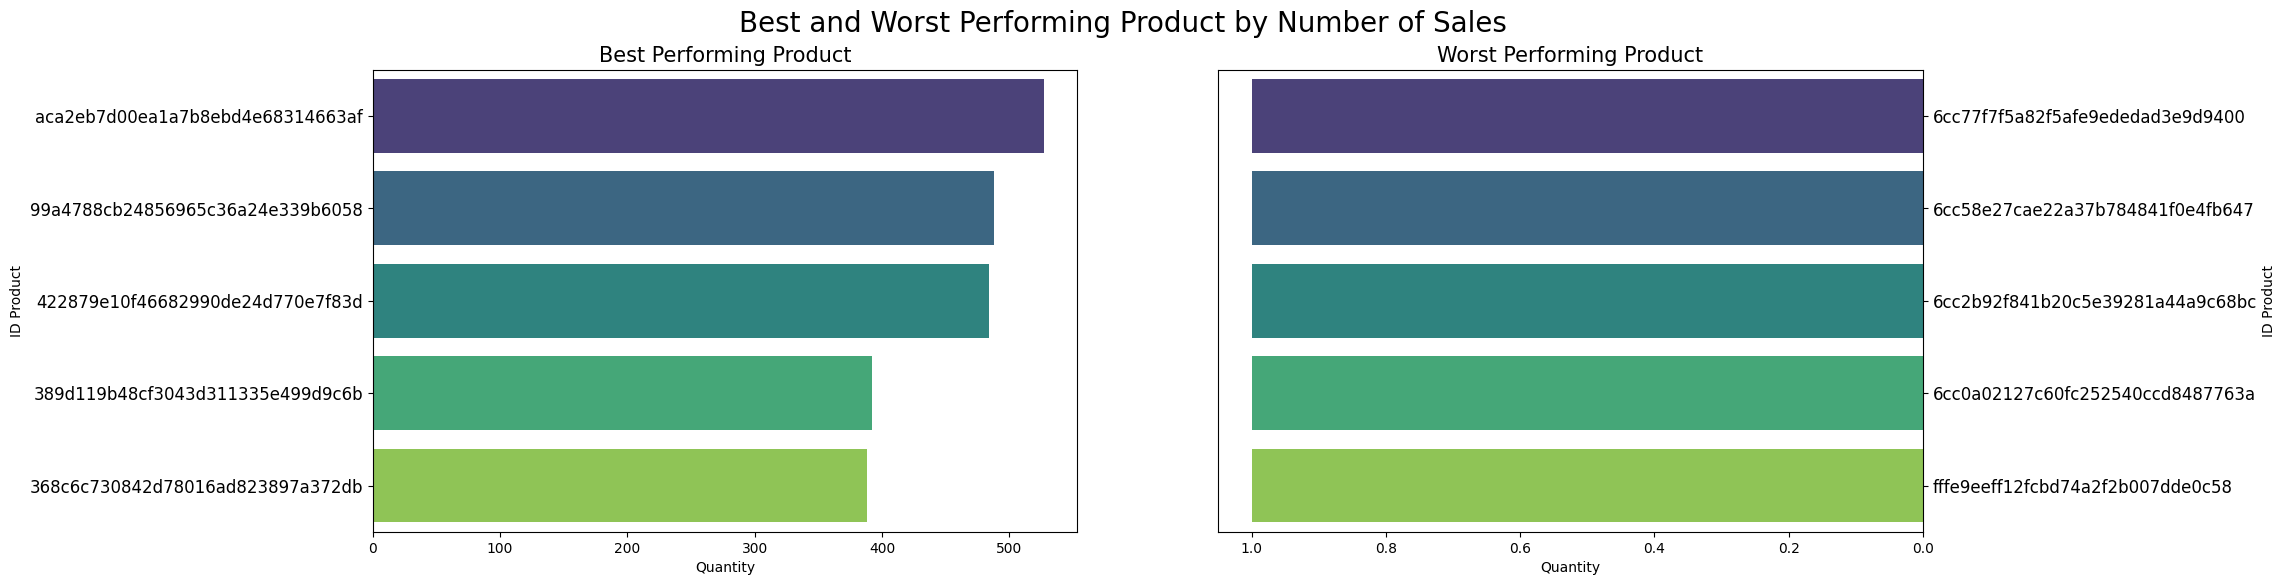

In [409]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(x='order_count', y='product_id', data=df_productSales.head(5), ax=ax[0], palette='viridis')
ax[0].set_ylabel('ID Product')
ax[0].set_xlabel('Quantity')
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='order_count', y='product_id', data=df_productSales.tail(5), ax=ax[1], palette='viridis')
ax[1].set_ylabel('ID Product')
ax[1].set_xlabel('Quantity')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Product by Number of Sales', fontsize=20)
plt.show()

### Pertanyaan 2: produk apa yang memiliki review score terbanyak dan tersedikit?

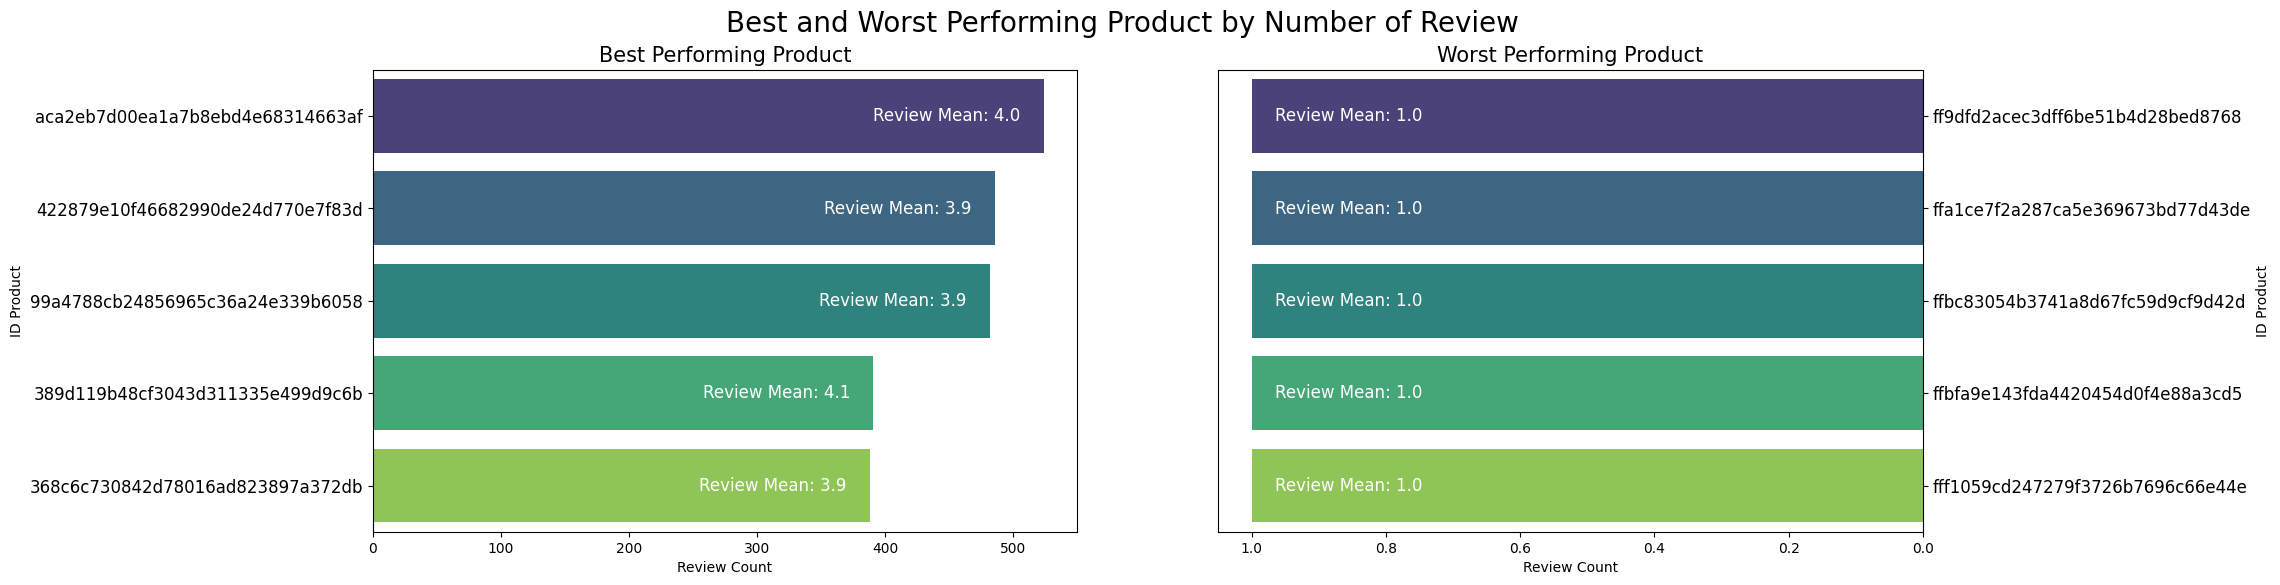

In [410]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(x='review_count', y='product_id', data=df_reviews.head(5), ax=ax[0], palette='viridis')
ax[0].set_ylabel('ID Product')
ax[0].set_xlabel('Review Count')
ax[0].set_title('Best Performing Product', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# menampilkan review_mean di setiap bar
for i, p in enumerate(ax[0].patches):
    ax[0].annotate(f'Review Mean: {df_reviews["review_mean"].iloc[i]:.1f}', 
                   (p.get_width(), p.get_y() + p.get_height()/2), 
                   ha='center', va='center', fontsize=12, color='white', xytext=(-70, 0), textcoords='offset points')

sns.barplot(x='review_count', y='product_id', data=df_reviews.tail(5), ax=ax[1], palette='viridis')
ax[1].set_ylabel('ID Product')
ax[1].set_xlabel('Review Count')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Product', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# menampilkan review_mean di setiap bar
for i, p in enumerate(ax[1].patches):
    ax[1].annotate(f'Review Mean: {df_reviews["review_mean"].iloc[-(i+1)]:.1f}', 
                   (p.get_width(), p.get_y() + p.get_height()/2), 
                   ha='center', va='center', fontsize=12, color='white', xytext=(70, 0), textcoords='offset points')

plt.suptitle('Best and Worst Performing Product by Number of Review', fontsize=20)
plt.show()

### Pertanyaan 3: customer dari negara mana yang memiliki pembelian terbanyak dan tersedikit?

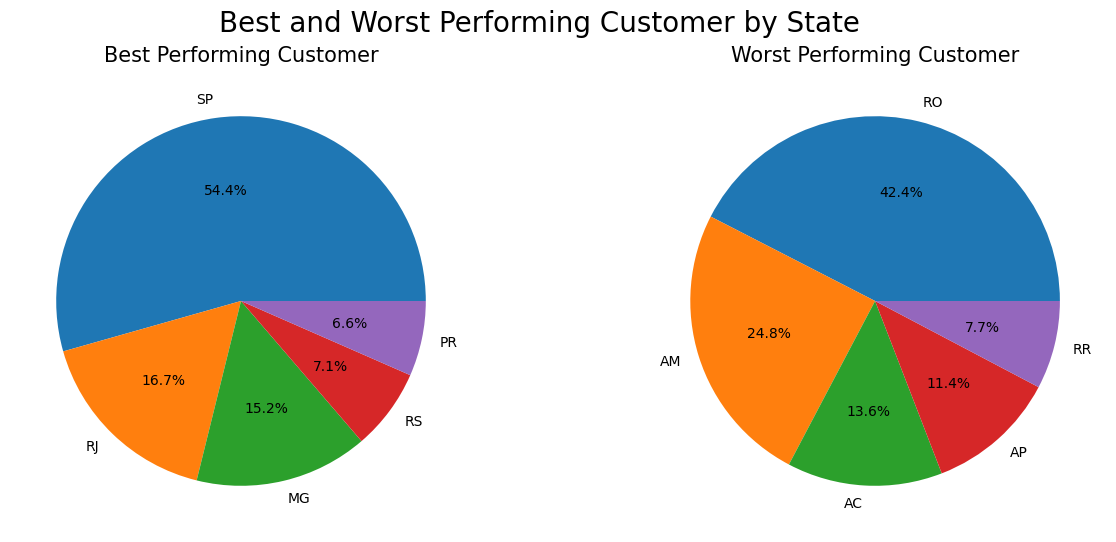

In [411]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ax[0].set_title('Best Performing Customer', loc='center', fontsize=15)
ax[0].pie(
  x=customerState['customer_id'].iloc[:5],
  labels=customerState['customer_state'].iloc[:5],
  autopct='%1.1f%%'
)

ax[1].set_title('Worst Performing Customer', loc='center', fontsize=15)
ax[1].pie(
  x=customerState['customer_id'].iloc[-5:],
  labels=customerState['customer_state'].iloc[-5:],
  autopct='%1.1f%%'
)

plt.suptitle('Best and Worst Performing Customer by State', fontsize=20)
plt.show()

### Pertanyaan 4: kapan terakhir customer melakukan pembelian?

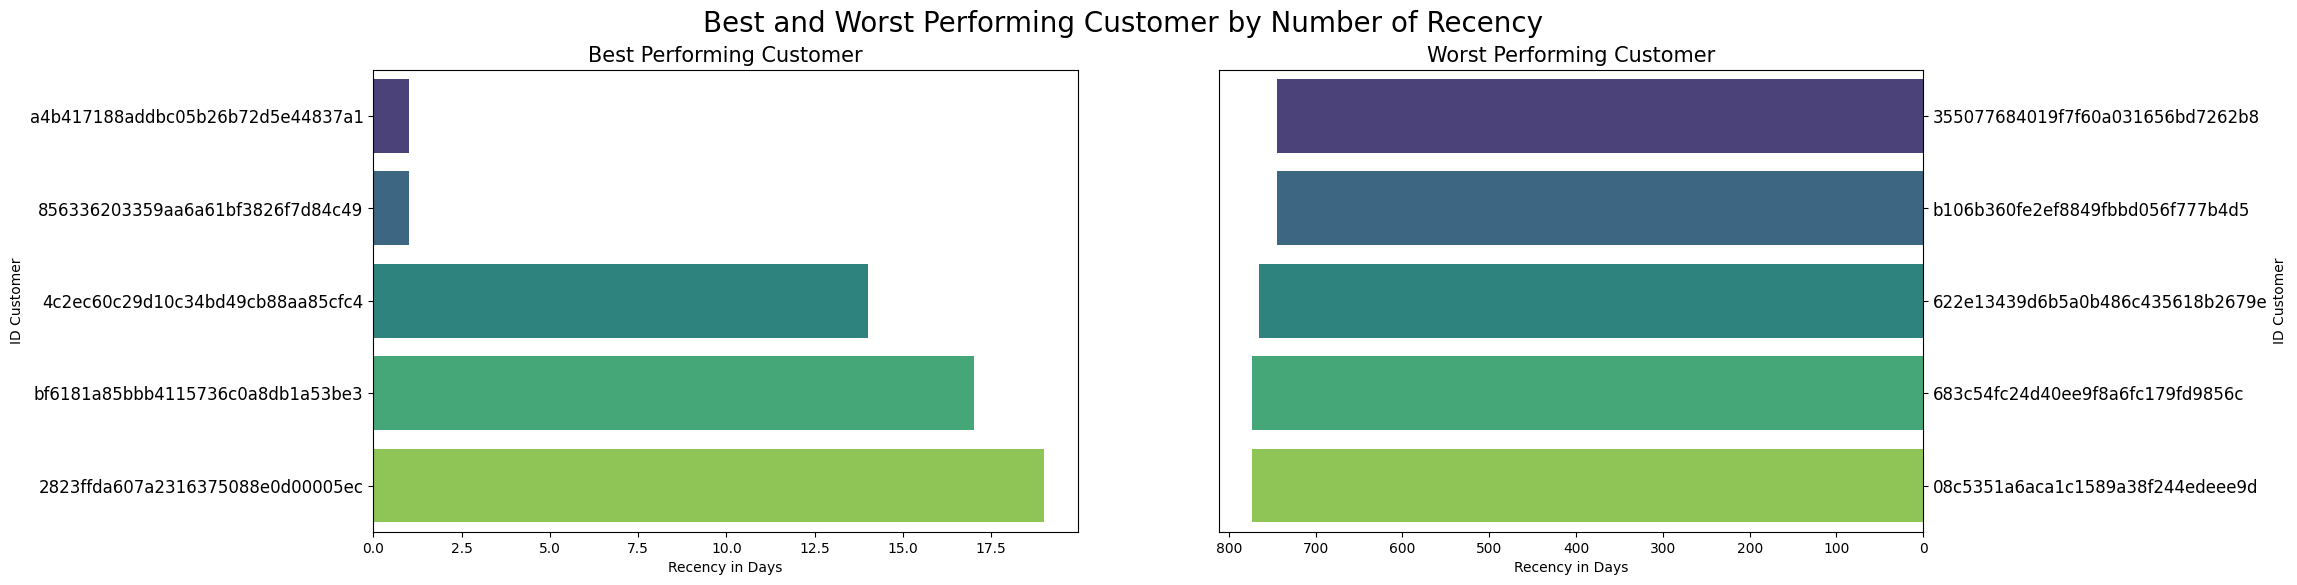

In [412]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(x='recency', y='customer_id', data=recency.head(5), ax=ax[0], palette='viridis')
ax[0].set_ylabel('ID Customer')
ax[0].set_xlabel('Recency in Days')
ax[0].set_title('Best Performing Customer', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='recency', y='customer_id', data=recency.tail(5), ax=ax[1], palette='viridis')
ax[1].set_ylabel('ID Customer')
ax[1].set_xlabel('Recency in Days')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Customer', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Customer by Number of Recency', fontsize=20)
plt.show()

### Pertanyaan 5: seberapa sering customer melakukan pembelian?

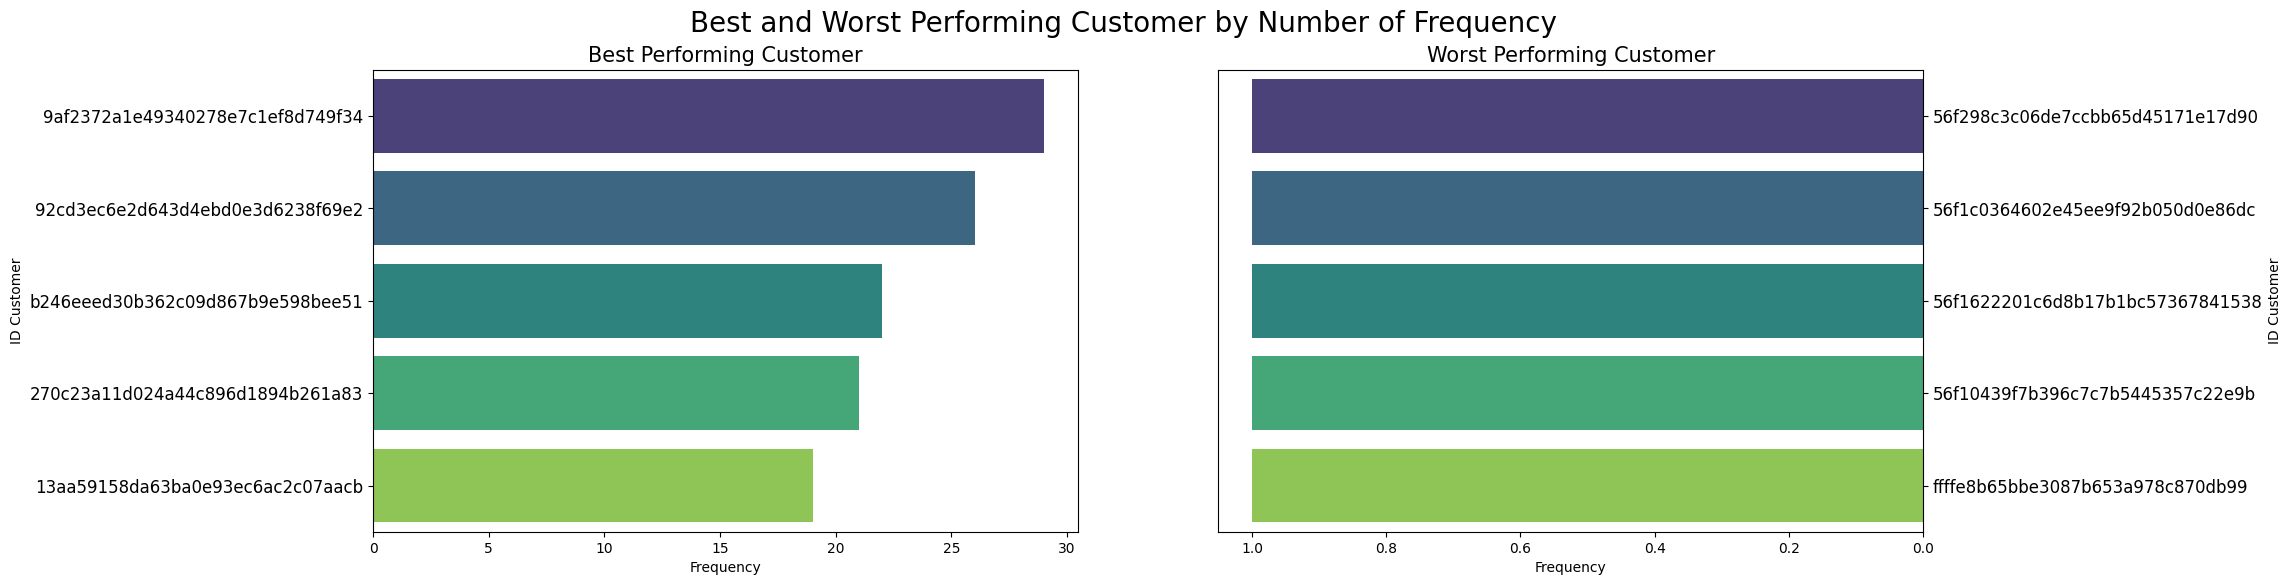

In [413]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(x='frequency', y='customer_id', data=frequency.head(5), ax=ax[0], palette='viridis')
ax[0].set_ylabel('ID Customer')
ax[0].set_xlabel('Frequency')
ax[0].set_title('Best Performing Customer', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='frequency', y='customer_id', data=frequency.tail(5), ax=ax[1], palette='viridis')
ax[1].set_ylabel('ID Customer')
ax[1].set_xlabel('Frequency')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Customer', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Customer by Number of Frequency', fontsize=20)
plt.show()

### Pertanyaan 6: berapa banyak uang yang dihabiskan customer untuk melakukan pembelian?

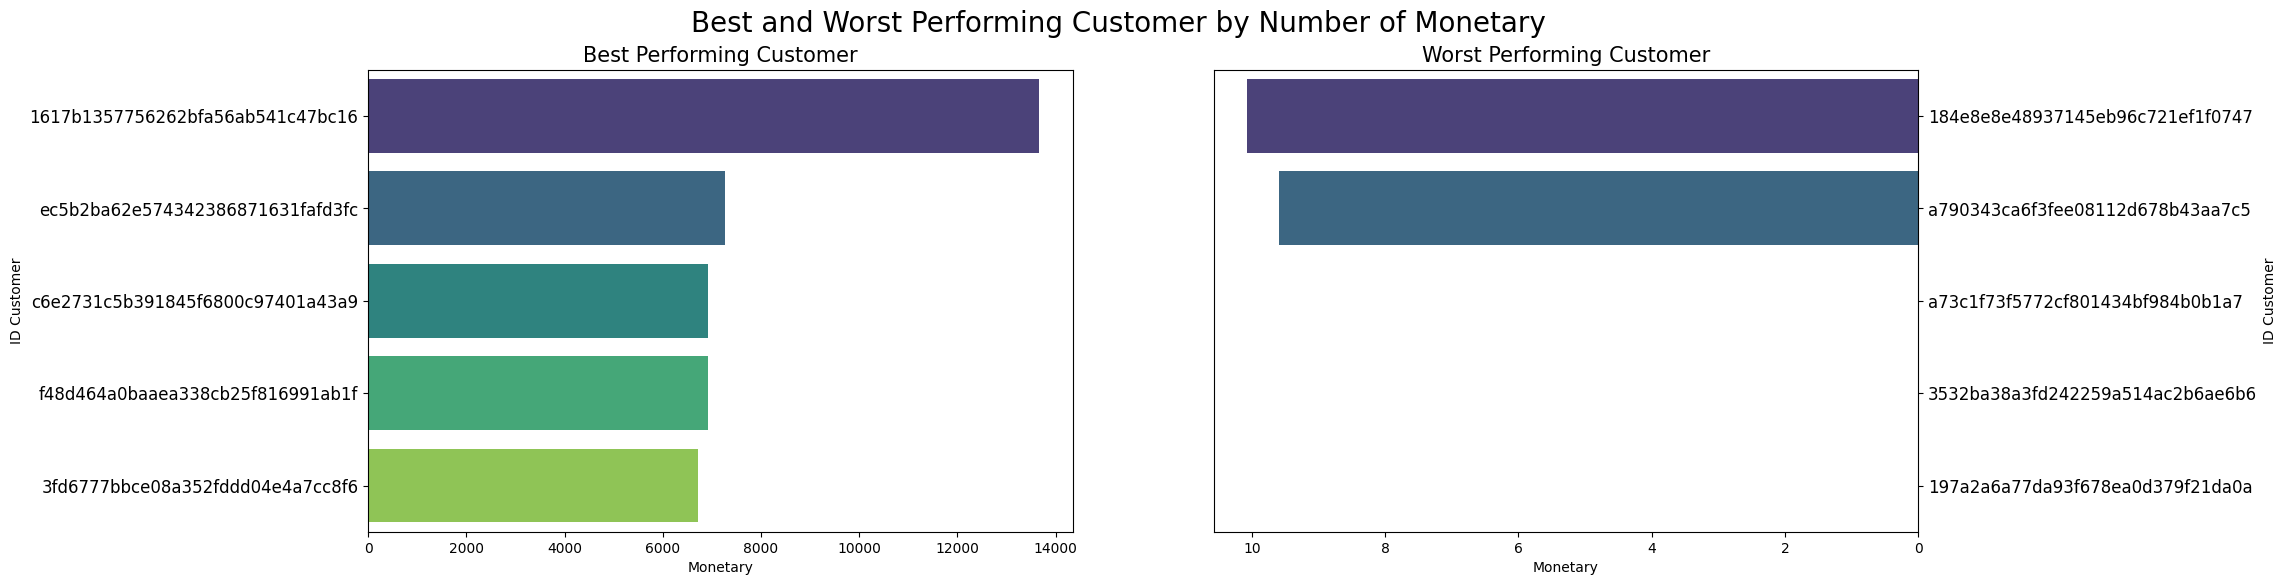

In [414]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))

sns.barplot(x='monetary', y='customer_id', data=monetary.head(5), ax=ax[0], palette='viridis')
ax[0].set_ylabel('ID Customer')
ax[0].set_xlabel('Monetary')
ax[0].set_title('Best Performing Customer', loc='center', fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x='monetary', y='customer_id', data=monetary.tail(5), ax=ax[1], palette='viridis')
ax[1].set_ylabel('ID Customer')
ax[1].set_xlabel('Monetary')
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title('Worst Performing Customer', loc='center', fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Best and Worst Performing Customer by Number of Monetary', fontsize=20)
plt.show()

### Pertanyaan 7: seller dari negara mana yang memiliki penjualan terbanyak dan tersedikit?

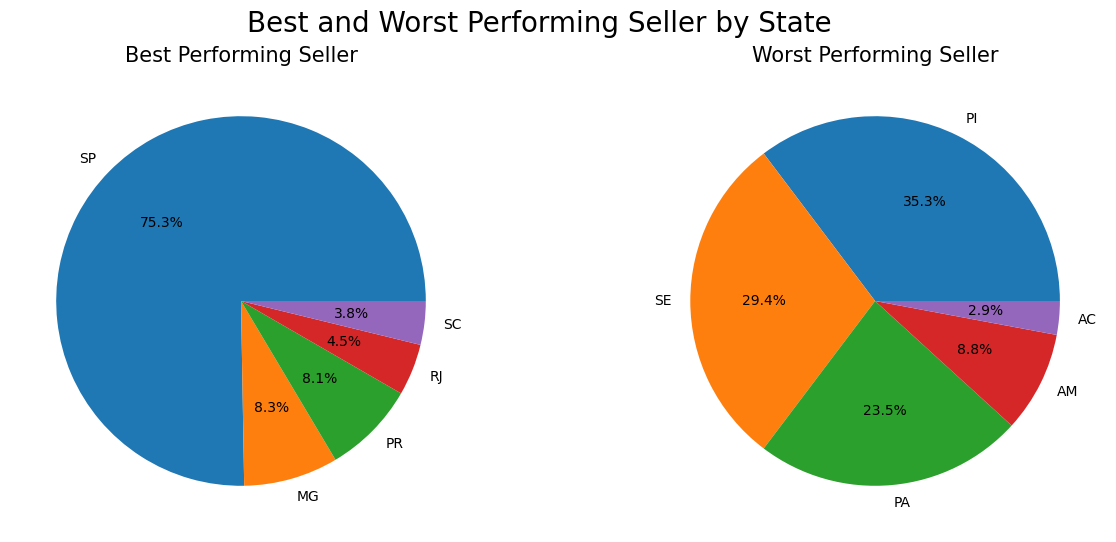

In [415]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

ax[0].set_title('Best Performing Seller', loc='center', fontsize=15)
ax[0].pie(
  x=sellerState['seller_id'].iloc[:5],
  labels=sellerState['seller_state'].iloc[:5],
  autopct='%1.1f%%'
)

ax[1].set_title('Worst Performing Seller', loc='center', fontsize=15)
ax[1].pie(
  x=sellerState['seller_id'].iloc[-5:],
  labels=sellerState['seller_state'].iloc[-5:],
  autopct='%1.1f%%'
)

plt.suptitle('Best and Worst Performing Seller by State', fontsize=20)
plt.show()

## Conclusion

### Conclution pertanyaan 1:
- perjualan produk terbanyak:
1. Id Produk: aca2eb7d00ea1a7b8ebd4e68314663af dengan jumlah penjualan 520
2. Id Produk: 422879e10f46682990de24d770e7f83d dengan jumlah penjualan 484
3. Id Produk: 99a4788cb24856965c36a24e339b6058 dengan jumlah penjualan 477
4. Id Produk: 389d119b48cf3043d311335e499d9c6b dengan jumlah penjualan 390
5. Id Produk: 368c6c730842d78016ad823897a372db dengan jumlah penjualan 388
- penjualan produk tersedikit yaitu:
1. Id Produk: 6d30e5e702df2b8719d9c6be1bdf425b dengan jumlah penjualan 1
2. Id Produk: 6d2c14b30e95a30ea57059b97cdd9fe7 dengan jumlah penjualan 1
3. Id Produk: 6d279e8024e26a17c156a724bbfc1e8d dengan jumlah penjualan 1
4. Id Produk: 6d23462e8e2016e7e18692e67a9c5b4b dengan jumlah penjualan 1
5. Id Produk: fffe9eeff12fcbd74a2f2b007dde0c58 dengan jumlah penjualan 1

### Conclution pertanyaan 2
- produk dengan review terbanyak:
1. Id Produk: aca2eb7d00ea1a7b8ebd4e68314663af dengan rata-rata review 4.0
2. Id Produk: 422879e10f46682990de24d770e7f83d dengan rata-rata review 3.9
3. Id Produk: 99a4788cb24856965c36a24e339b6058 dengan rata-rata review 3.8
4. Id Produk: 389d119b48cf3043d311335e499d9c6b dengan rata-rata review 4.1
5. Id Produk: 368c6c730842d78016ad823897a372db dengan rata-rata review 3.9
- produk dengan review tersedikit:
1. Id Produk: ff9dfd2acec3dff6be51b4d28bed8768 dengan rata-rata review 1.0
2. Id Produk: ffa1ce7f2a287ca5e369673bd77d43de dengan rata-rata review 1.0
3. Id Produk: ffbc83054b3741a8d67fc59d9cf9d42d dengan rata-rata review 1.0
4. Id Produk: ffbfa9e143fda4420454d0f4e88a3cd5 dengan rata-rata review 1.0
5. Id Produk: fff1059cd247279f3726b7696c66e44e dengan rata-rata review 1.0

### Conclution pertanyaan 3
- negara dengan customer terbanyak:
1. Negara: SP (São Paulo) dengan jumlah customer 40501
2. Negara: RJ (Rio de Janeiro) dengan jumlah customer 12350
3. Negara: MG (Minas Gerais) dengan jumlah customer 11354
4. Negara: RS (Rio Grande Selatan) dengan jumlah customer 5345
5. Negara: PR (Paraná) dengan jumlah customer 4923
- negara dengan customer tersedikit:
1. Negara: RO (Rondônia) dengan jumlah customer 243
2. Negara: AM (Amazonas) dengan jumlah customer 145
3. Negara: AC (Acre) dengan jumlah customer 80
4. Negara: AP (Amapá) dengan jumlah customer 67
5. Negara: RR (Roraima) dengan jumlah customer 41

### Conclution pertanyaan 4
- customer yang melakukan pembelian terbaru:
1. Id Customer: 856336203359aa6a61bf3826f7d84c49 dengan tanggal pembelian 2018-10-16 20:16:02, 1 hari yang lalu
2. Id Customer: a4b417188addbc05b26b72d5e44837a1 dengan tanggal pembelian 2018-10-17 17:30:18, 1 hari yang lalu
3. Id Customer: 4c2ec60c29d10c34bd49cb88aa85cfc4 dengan tanggal pembelian 2018-10-03 18:55:29, 14 hari yang lalu
4. Id Customer: bf6181a85bbb4115736c0a8db1a53be3 dengan tanggal pembelian 2018-10-01 15:30:09, 17 hari yang lalu
5. Id Customer: 2823ffda607a2316375088e0d00005ec dengan tangal pembelian 2018-09-29 09:13:03, 19 hari yang lalu
- customer yang melakukan pembelian terakhir:
1. Id Customer: 7ec40b22510fdbea1b08921dd39e63d8 dengan tangal pembelian 2016-10-03 16:56:50, 745 hari yang lalu
2. Id Customer: 86dc2ffce2dfff336de2f386a786e574 dengan tangal pembelian 2016-09-15 12:16:38, 763 hari yang lalu
3. Id Customer: 622e13439d6b5a0b486c435618b2679e dengan tangal pembelian 2016-09-13 15:24:19, 765 hari yang lalu
4. Id Customer: 683c54fc24d40ee9f8a6fc179fd9856c dengan tangal pembelian 2016-09-05 00:15:34, 773 hari yang lalu
5. Id Customer: 08c5351a6aca1c1589a38f244edeee9d dengan tangal pembelian 2016-09-04 21:15:19, 773 hari yang lalu

### Conclution pertanyaan 5
- customer yang terbanyak melakukan pembelian:
1. Id Customer: 9af2372a1e49340278e7c1ef8d749f34 dengan jumlah pembelian 29
2. Id Customer: 92cd3ec6e2d643d4ebd0e3d6238f69e2 dengan jumlah pembelian 26
3. Id Customer: b246eeed30b362c09d867b9e598bee51 dengan jumlah pembelian 22
4. Id Customer: 270c23a11d024a44c896d1894b261a83 dengan jumlah pembelian 21
5. Id Customer: 13aa59158da63ba0e93ec6ac2c07aacb dengan jumlah pembelian 19
- customer yang tersedikit melakukan pembelian:
1. Id Customer: 56f48a4b6b679bf9b82d46ff1be7875a dengan jumlah pembelian 1
2. Id Customer: 56f298c3c06de7ccbb65d45171e17d90 dengan jumlah pembelian 1
3. Id Customer: 56f1c0364602e45ee9f92b050d0e86dc dengan jumlah pembelian 1
4. Id Customer: 56f1622201c6d8b17b1bc57367841538 dengan jumlah pembelian 1
5. Id Customer: ffffe8b65bbe3087b653a978c870db99 dengan jumlah pembelian 1

### Conclution pertanyaan 6
- customer yang menghabiskan uang terbanyak untuk pembelian:
1. Id Customer: 1617b1357756262bfa56ab541c47bc16 dengan total uang 13664.08
2. Id Customer: ec5b2ba62e574342386871631fafd3fc dengan total uang 7274.88
3. Id Customer: c6e2731c5b391845f6800c97401a43a9 dengan total uang 6929.31
4. Id Customer: f48d464a0baaea338cb25f816991ab1f dengan total uang 6922.21
5. Id Customer: 3fd6777bbce08a352fddd04e4a7cc8f6 dengan total uang 6726.66
- customer yang menghabiskan uang tersedikit untuk pembelian:
1. Id Customer: a790343ca6f3fee08112d678b43aa7c5 dengan total uang 9.59
2. Id Customer: 197a2a6a77da93f678ea0d379f21da0a dengan total uang 0.00
3. Id Customer: a73c1f73f5772cf801434bf984b0b1a7 dengan total uang 0.00
4. Id Customer: 86dc2ffce2dfff336de2f386a786e574 dengan total uang 0.00
5. Id Customer: 3532ba38a3fd242259a514ac2b6ae6b6 dengan total uang 0.00

### Conclution pertanyaan 7
- negara seller dengan penjualan terbanyak:
1. Negara: SP (São Paulo) dengan jumlah penjualan 78604
2. Negara: MG (Minas Gerais) dengan jumlah penjualan 8603
5. Negara: PR (Paraná) dengan jumlah penjualan 8487
3. Negara: RJ (Rio de Janeiro) dengan jumlah penjualan 4685
4. Negara: SC (Santa Catarina) dengan jumlah penjualan 4000
- negara seller dengan penjualan tersedikit:
1. Negara: RO (Rondônia) dengan jumlah penjualan 14
2. Negara: PI (Piauí) dengan jumlah penjualan 11
3. Negara: SE (Sergipe) dengan jumlah penjualan 10
4. Negara: PA (Pará) dengan jumlah penjualan 8
5. Negara: AM (Amazonas) dengan jumlah penjualan 3